In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from sklearn.model_selection import KFold
import regex as re

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [35]:
choosen_column = ['listing_id','title','make','model','type_of_vehicle','category','transmission','fuel_type']

In [36]:
for column in train_df.columns:
    if column not in choosen_column:
        train_df = train_df.drop([column],axis=1)
        try:
            test_df = test_df.drop([column],axis=1)
        except:
            pass

In [37]:
train_df['fuel_type'] = train_df['fuel_type'].replace(np.nan,"unknown")
test_df['fuel_type'] = test_df['fuel_type'].replace(np.nan,"unknown")
train_df['make'] = train_df['make'].replace(np.nan,"undetermined")
test_df['make'] = test_df['make'].replace(np.nan,"undetermined")

In [38]:
for column in choosen_column:
    if train_df[column].isnull().values.any():
        print(column)

In [39]:
tmpDF = pd.DataFrame(columns=['title','misc','misc2'])
tmpDF[['title','misc','misc2']] = train_df['title'].str.split('(',expand=True)
tmpDF2 = pd.DataFrame(columns=['title','misc','misc2'])
tmpDF2[['title','misc','misc2']] = test_df['title'].str.split('(',expand=True)

train_df['title'] = tmpDF['title']
test_df['title'] = tmpDF['title']

In [40]:
print(train_df.shape)
train_df.to_csv('train_clean_cossim.csv')
test_df.to_csv('test_clean_cossim.csv')

(16784, 8)


PermissionError: [Errno 13] Permission denied: 'test_clean_cossim.csv'

In [41]:
x = (train_df.groupby('make').fuel_type.value_counts().unstack().fillna(0))

<AxesSubplot:xlabel='fuel_type', ylabel='make'>

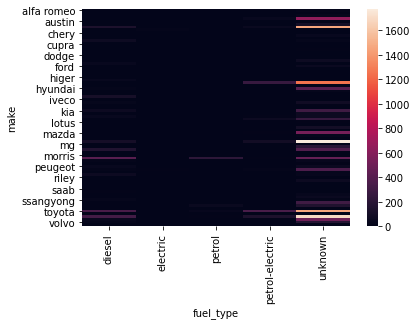

In [44]:
sns.heatmap(x)